In [40]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
import statsmodels.api as sm

# to prevent the scientific notation. 
pd.set_option('display.float_format', lambda x:'%.4f' % x)

In [41]:
# March to End August
# March to End August
file_name_km = 'data/ULAHZ6UJFN_KM_202109_202209.csv'
file_name_surabaya = 'data/ULAHZ6UJFN_SURABAYA_202109_202209.csv'
file_name_gresik = 'data/ULAHZ6UJFN_GRESIK_202109_202209.csv'
file_name_all = 'data/ULAHZ6UJFN.csv'

file_km = pd.read_csv(file_name_km)
file_surabaya = pd.read_csv(file_name_surabaya)
file_gresik = pd.read_csv(file_name_gresik)

# file_name = pd.concat([file_km, file_surabaya, file_gresik])
file_name = pd.read_csv(file_name_all)

In [42]:
usin= 'ULAHZ6UJFN'

In [86]:
# date time formatting 

file_name['order_date_jkt']= pd.to_datetime(file_name['order_date_jkt'])
file_name['year'] = file_name['order_date_jkt'].dt.year
file_name['month'] = file_name['order_date_jkt'].dt.month
file_name['year_month'] = pd.to_datetime(file_name['order_date_jkt']).dt.to_period('M')
file_name['day'] = file_name['order_date_jkt'].dt.day
file_name['week'] = file_name['order_date_jkt'].dt.week
file_name['weekday'] = file_name['order_date_jkt'].dt.weekday
# 0 - Monday, 1- Tuesday

# Derived Columns
file_name['log_quantity'] = file_name['order_quantity'].apply(lambda x:(math.log(x)))
file_name['log_sp'] = file_name['price_sold_at'].apply(lambda x:math.log(x* 0.00001)).astype('float')


/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_8149/3482171972.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  file_name['week'] = file_name['order_date_jkt'].dt.week


In [87]:
file_name.columns

Index(['order_date_jkt', 'price_sold_at', 'order_quantity', 'city', 'province',
       'pricing_engine_buying_price', 'year', 'month', 'year_month', 'day',
       'week', 'weekday', 'std_price', 'log_quantity', 'log_sp'],
      dtype='object')

In [88]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
file_name['std_price'] = scaler.fit_transform(np.array(file_name['price_sold_at']).reshape(-1,1))

### Before Normalization

array([[<AxesSubplot:title={'center':'price_sold_at'}>,
        <AxesSubplot:title={'center':'order_quantity'}>]], dtype=object)

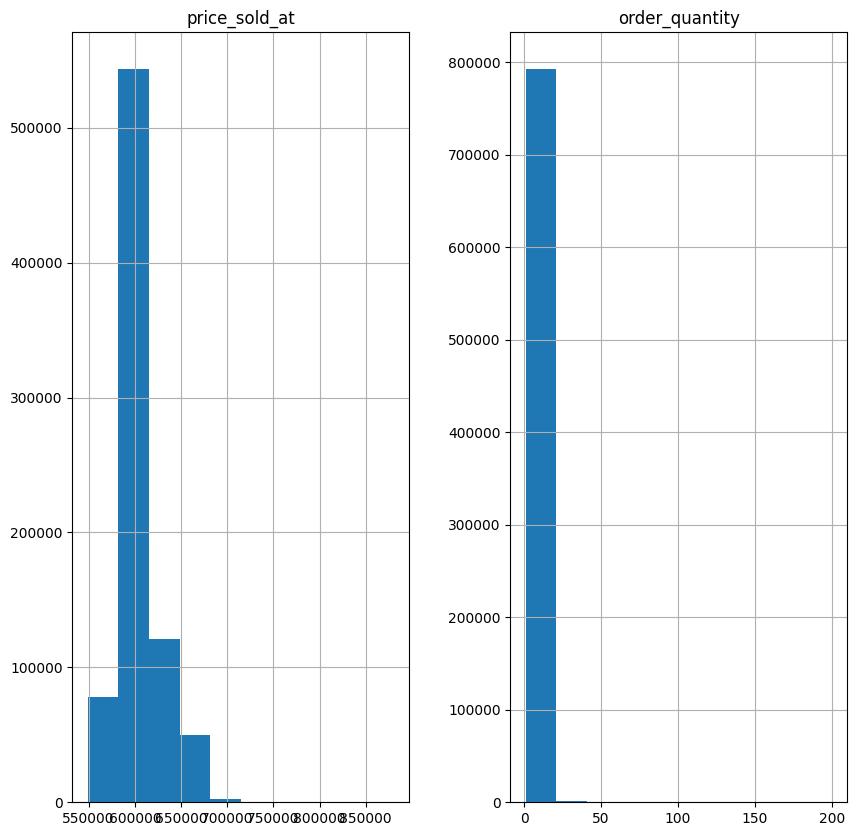

In [89]:
scale = ['price_sold_at', 'order_quantity']
relevant = file_name[scale]
# relevant = relevant[relevant['order_quantity'] <40]

relevant.hist(figsize=(10,10))

### After log normalization

array([[<AxesSubplot:title={'center':'log_sp'}>,
        <AxesSubplot:title={'center':'log_quantity'}>]], dtype=object)

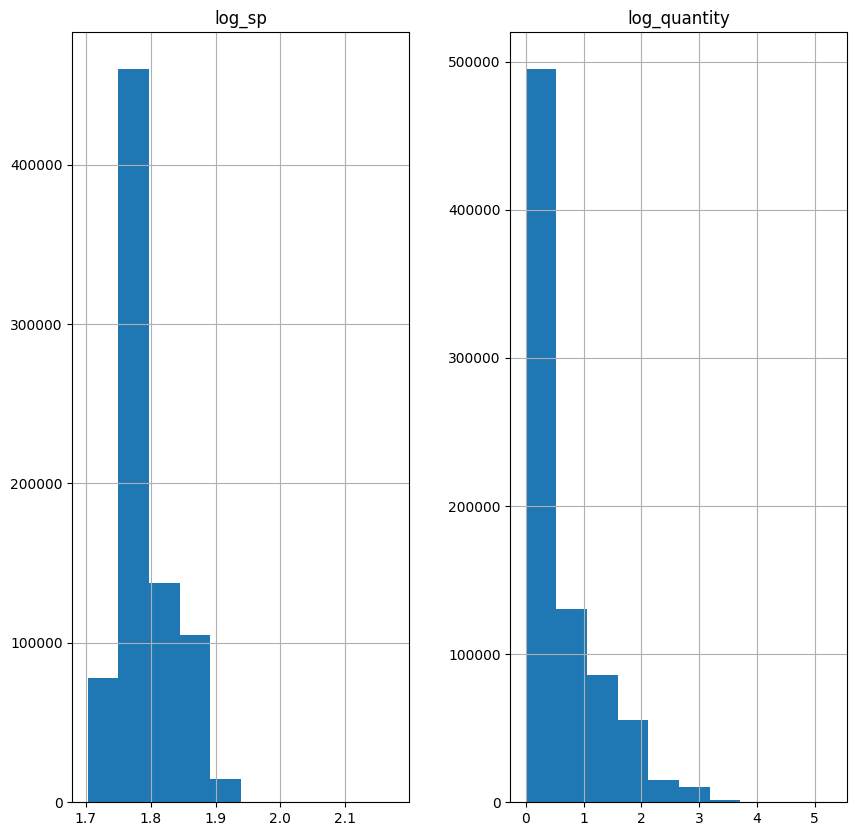

In [90]:
scale = ['log_sp', 'log_quantity']
relevant = file_name[scale]
# relevant = relevant[relevant['order_quantity'] <40]

relevant.hist(figsize=(10,10))

### After the min max scaling / Z-transform. 

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_8149/3597331718.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant[['price_sold_at', 'order_quantity']] = ss.fit_transform(relevant[['price_sold_at', 'order_quantity']])


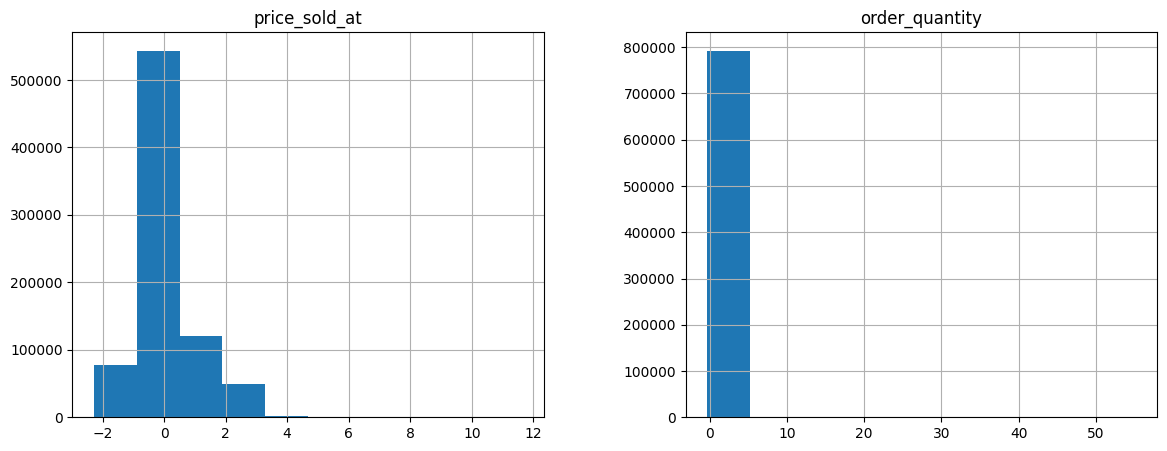

In [98]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Init, fit
ss = StandardScaler()
scale = ['price_sold_at', 'order_quantity']
relevant = file_name[scale]
relevant[['price_sold_at', 'order_quantity']] = ss.fit_transform(relevant[['price_sold_at', 'order_quantity']])

relevant.hist(figsize=(14, 5));
# # Transform
# relevant = pd.DataFrame(ss.transform(relevant), columns=to_scale)

# # Plot
# relevant[to_scale].hist(figsize=(14, 14))

/var/folders/s8/0sq2x4cs1wj55b0rfdhhc0hc0000gn/T/ipykernel_8149/2221828784.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant[['price_sold_at', 'order_quantity']] = ss.fit_transform(relevant[['price_sold_at', 'order_quantity']])


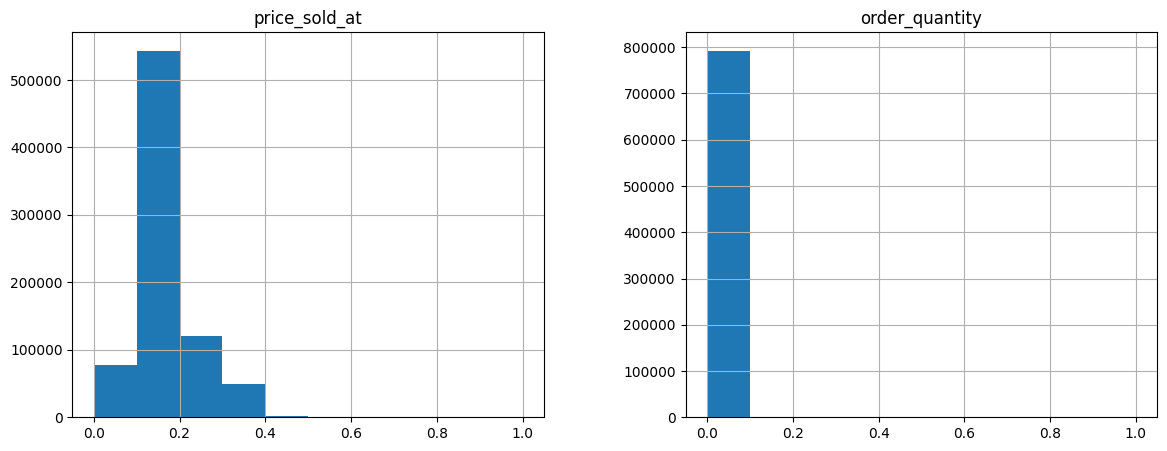

In [99]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Init, fit
ss = MinMaxScaler()
scale = ['price_sold_at', 'order_quantity']
relevant = file_name[scale]
relevant[['price_sold_at', 'order_quantity']] = ss.fit_transform(relevant[['price_sold_at', 'order_quantity']])

relevant.hist(figsize=(14, 5));
# # Transform
# relevant = pd.DataFrame(ss.transform(relevant), columns=to_scale)

# # Plot
# relevant[to_scale].hist(figsize=(14, 14))

In [100]:
relevant

,price_sold_at,order_quantity
0,0.0458,0.0000
1,0.0458,0.0000
2,0.0380,0.0050
3,0.0380,0.0050
4,0.0380,0.0050
...,...,...
794824,0.1297,0.0000
794825,0.1297,0.0000
794826,0.1297,0.0000
794827,0.1297,0.0000


array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

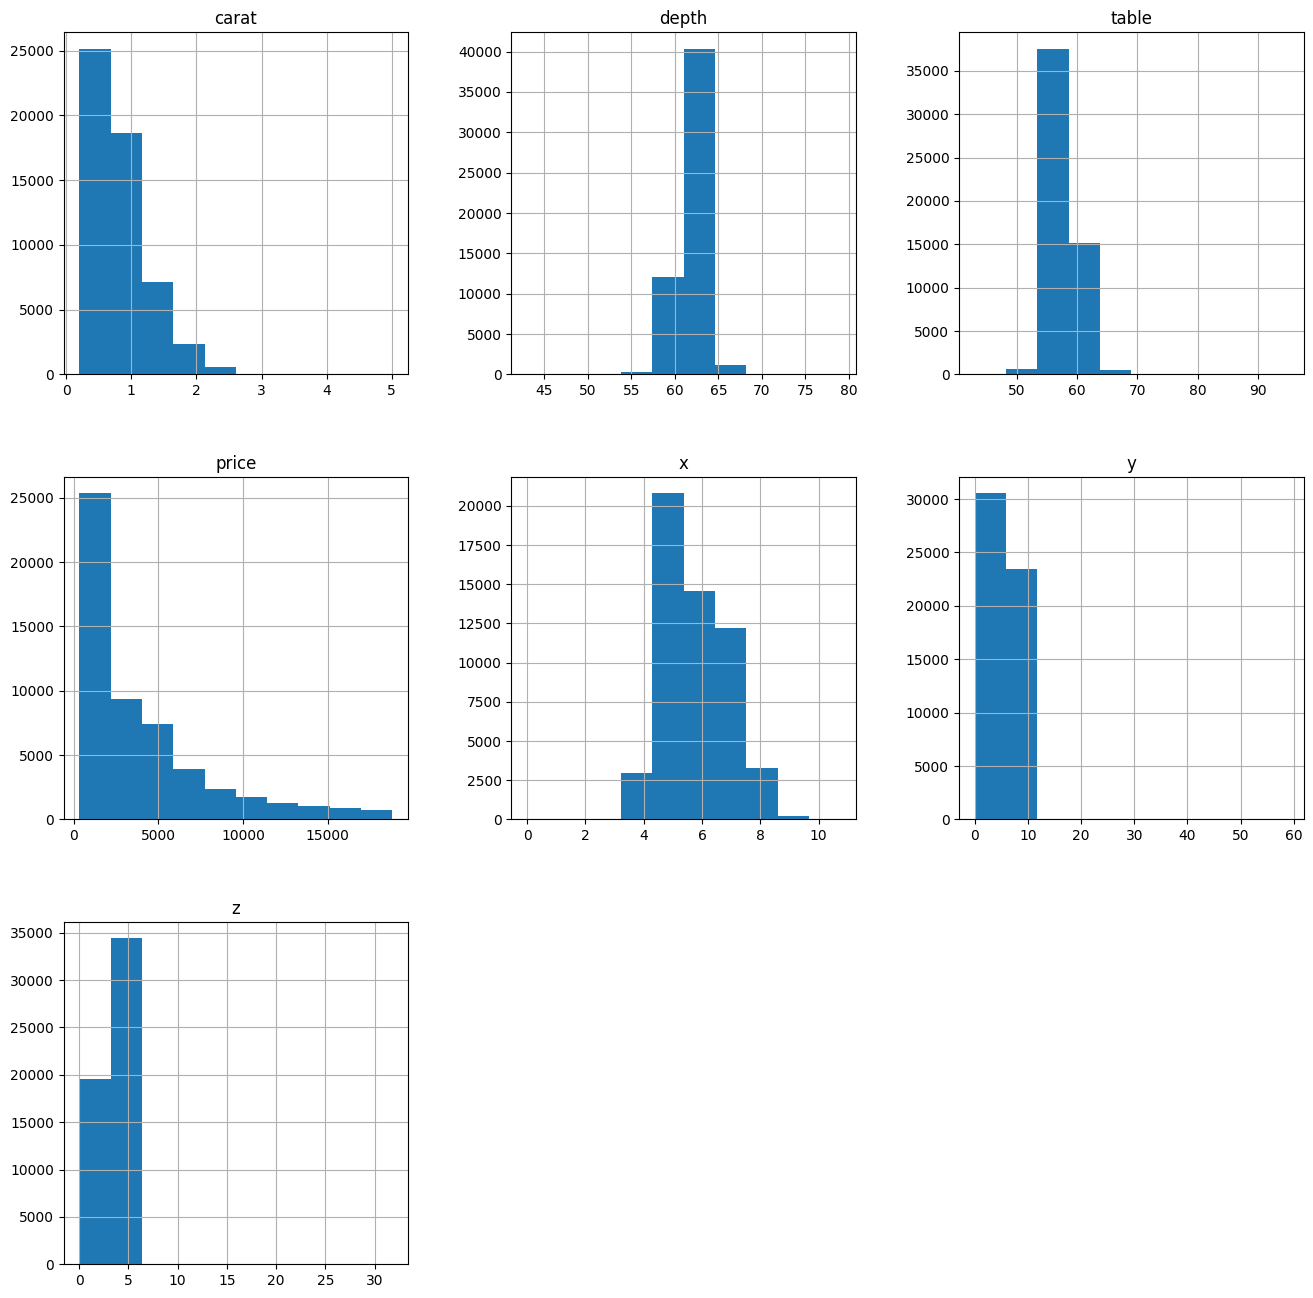

In [75]:
diamonds = sns.load_dataset("diamonds")
diamonds.hist(figsize=(16, 16))

In [6]:
file_name.head()

,order_date_jkt,price_sold_at,order_quantity,city,province,pricing_engine_buying_price,year,month,year_month,day,week,weekday,std_price
0,2021-10-26,564100,1,GRESIK,JAWA TIMUR,NaN,2021,10,2021-10,26,43,1,-1.6444
1,2021-10-26,564100,1,GRESIK,JAWA TIMUR,NaN,2021,10,2021-10,26,43,1,-1.6444
2,2021-10-26,561500,2,KABUPATEN MALANG,JAWA TIMUR,NaN,2021,10,2021-10,26,43,1,-1.7536
3,2021-10-26,561500,2,KABUPATEN MALANG,JAWA TIMUR,NaN,2021,10,2021-10,26,43,1,-1.7536
4,2021-10-26,561500,2,KABUPATEN MALANG,JAWA TIMUR,NaN,2021,10,2021-10,26,43,1,-1.7536


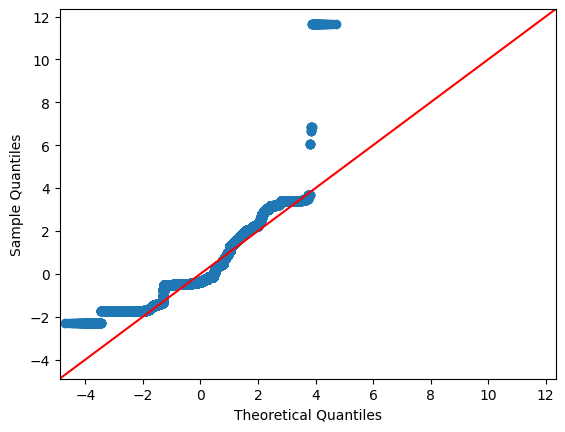

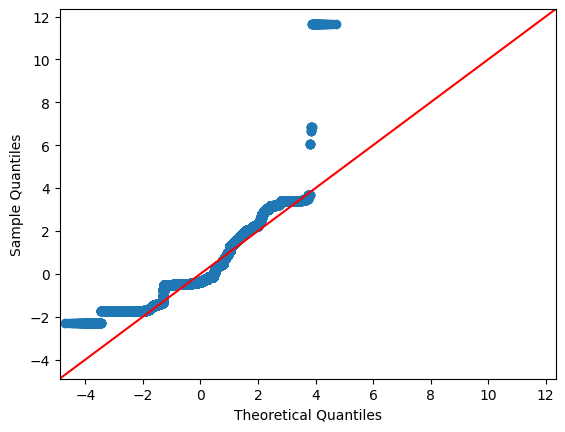

In [7]:
sm.qqplot(file_name['std_price'], line ='45')